# Fresh Flow Markets - Operational, Marketing & Pricing Analysis

**Analysis Date:** February 5, 2026  
**Project:** Deloitte x AUC Hackathon  
**Client:** Fresh Flow Markets

---

## Executive Summary

This comprehensive analysis examines three critical business dimensions:

### 1. **Quality & Satisfaction**
- Wait time analysis and operational efficiency
- Cashier performance metrics
- Order processing time analysis

### 2. **Marketing Efficiency**
- Bonus code effectiveness
- Campaign timing optimization
- Redemption frequency patterns

### 3. **Pricing & Revenue**
- Discount impact on order volume (price elasticity)
- Minimum delivery amount impact on order value
- Revenue optimization strategies

---

## 📚 Table of Contents

1. [Setup & Data Loading](#setup)
2. [Data Overview](#overview)
3. [Quality & Satisfaction Analysis](#quality)
4. [Marketing Efficiency Analysis](#marketing)
5. [Pricing & Revenue Analysis](#pricing)
6. [Key Insights & Recommendations](#insights)
7. [Export Results](#export)

<a id='setup'></a>
## 1. Setup & Data Loading

In [71]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime, timedelta
import warnings
import os

# Configure settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("Fresh Flow Markets - Operational, Marketing & Pricing Analysis")
print("="*80)
print("\n✅ Libraries imported successfully")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Fresh Flow Markets - Operational, Marketing & Pricing Analysis

✅ Libraries imported successfully
📅 Analysis Date: 2026-02-05 02:38:31


In [49]:
# Load all data files
print("\n" + "="*80)
print("LOADING DATA FILES")
print("="*80)

data_path = '../data/Inventory Management/'

# Load fact tables
orders = pd.read_csv(data_path + 'fct_orders.csv')
order_items = pd.read_csv(data_path + 'fct_order_items.csv')
campaigns = pd.read_csv(data_path + 'fct_campaigns.csv')
bonus_codes = pd.read_csv(data_path + 'fct_bonus_codes.csv')

# Load dimension tables
dim_campaigns = pd.read_csv(data_path + 'dim_campaigns.csv')
dim_users = pd.read_csv(data_path + 'dim_users.csv')
dim_places = pd.read_csv(data_path + 'dim_places.csv')

print("\n✅ Data Files Loaded:")
print(f"   • fct_orders: {len(orders):,} rows")
print(f"   • fct_order_items: {len(order_items):,} rows")
print(f"   • fct_campaigns: {len(campaigns):,} rows")
print(f"   • fct_bonus_codes: {len(bonus_codes):,} rows")
print(f"   • dim_campaigns: {len(dim_campaigns):,} rows")
print(f"   • dim_users: {len(dim_users):,} rows")
print(f"   • dim_places: {len(dim_places):,} rows")


LOADING DATA FILES



✅ Data Files Loaded:
   • fct_orders: 371,667 rows
   • fct_order_items: 1,974,592 rows
   • fct_campaigns: 641 rows
   • fct_bonus_codes: 6 rows
   • dim_campaigns: 641 rows
   • dim_users: 22,762 rows
   • dim_places: 1,056 rows


<a id='overview'></a>
## 2. Data Overview & Preparation

In [50]:
# Parse datetime columns
print("\n" + "="*80)
print("DATA PREPARATION")
print("="*80)

# Convert datetime columns in orders
datetime_cols = ['created', 'updated', 'confirmed_at', 'ready_at', 'assigned_at', 
                 'picked_up_at', 'delivered_at', 'canceled_at']

for col in datetime_cols:
    if col in orders.columns:
        orders[col] = pd.to_datetime(orders[col], errors='coerce')

# Convert campaigns datetime
if 'created' in campaigns.columns:
    campaigns['created'] = pd.to_datetime(campaigns['created'], errors='coerce')
if 'start_date' in dim_campaigns.columns:
    dim_campaigns['start_date'] = pd.to_datetime(dim_campaigns['start_date'], errors='coerce')
if 'end_date' in dim_campaigns.columns:
    dim_campaigns['end_date'] = pd.to_datetime(dim_campaigns['end_date'], errors='coerce')

print("\n✅ Datetime columns parsed successfully")

# Display basic info
print("\n📊 Orders Dataset Info:")
print(f"   Columns: {list(orders.columns)}")
print(f"   Date Range: {orders['created'].min()} to {orders['created'].max()}")
print(f"   Total Revenue: {orders['total_amount'].sum():,.2f} DKK")


DATA PREPARATION

✅ Datetime columns parsed successfully

📊 Orders Dataset Info:
   Columns: ['id', 'user_id', 'created', 'updated', 'updated_by', 'cash_amount', 'cashier_notified', 'channel', 'code', 'delivery_charge', 'demo_mode', 'discount_amount', 'instructions', 'items_amount', 'payment_method', 'place_id', 'points_earned', 'points_redeemed', 'promise_time', 'source', 'status', 'tier_id', 'total_amount', 'trainee_mode', 'type', 'vat_amount', 'created_at', 'order_hour', 'order_day_of_week', 'order_month', 'order_year', 'order_date']
   Date Range: 2021-02-12 14:17:09 to 2024-02-16 19:14:54
   Total Revenue: 48,812,536.45 DKK


In [51]:
# Check available columns in datasets
print("\n📊 Available Columns in Datasets:")
print("\n fct_orders columns:")
print(list(orders.columns))
print("\n📅 Sample order data:")
print(orders.head(2).T)


📊 Available Columns in Datasets:

 fct_orders columns:
['id', 'user_id', 'created', 'updated', 'updated_by', 'cash_amount', 'cashier_notified', 'channel', 'code', 'delivery_charge', 'demo_mode', 'discount_amount', 'instructions', 'items_amount', 'payment_method', 'place_id', 'points_earned', 'points_redeemed', 'promise_time', 'source', 'status', 'tier_id', 'total_amount', 'trainee_mode', 'type', 'vat_amount', 'created_at', 'order_hour', 'order_day_of_week', 'order_month', 'order_year', 'order_date']

📅 Sample order data:
                                     0                    1
id                               60825                60841
user_id                            512                  514
created            2021-02-12 14:17:09  2021-02-12 15:46:23
updated            2023-06-22 21:55:23  2023-06-22 21:55:23
updated_by                         512                  514
cash_amount                      50.00               655.00
cashier_notified                   NaN              

In [52]:
# Create derived time metrics for quality analysis
print("\n" + "="*80)
print("CREATING TIME METRICS FOR QUALITY ANALYSIS")
print("="*80)

# Calculate order processing time (created to updated)
if 'updated' in orders.columns and 'created' in orders.columns:
    orders['processing_time_minutes'] = (orders['updated'] - orders['created']).dt.total_seconds() / 60
    orders['processing_time_minutes'] = orders['processing_time_minutes'].clip(lower=0, upper=1440)  # Cap at 24 hours

# Extract time features (already exist from data loading, but ensure they're set)
if 'order_hour' not in orders.columns:
    orders['order_hour'] = orders['created'].dt.hour
if 'order_day_of_week' not in orders.columns:
    orders['order_day_of_week'] = orders['created'].dt.dayofweek
if 'order_date' not in orders.columns:
    orders['order_date'] = orders['created'].dt.date

# Create day name for readability
orders['day_name'] = orders['created'].dt.day_name()

print("\n✅ Time Metrics Created:")
print("   • Order Processing Time (created → updated)")
print("   • Order Hour of Day")
print("   • Order Day of Week")
print("   • Order Date")

# Display sample statistics
if 'processing_time_minutes' in orders.columns:
    valid_processing = orders[orders['processing_time_minutes'].notna()]
    if len(valid_processing) > 0:
        print("\n📊 Order Processing Time Statistics (minutes):")
        print(f"   • Mean: {valid_processing['processing_time_minutes'].mean():.2f}")
        print(f"   • Median: {valid_processing['processing_time_minutes'].median():.2f}")
        print(f"   • 75th Percentile: {valid_processing['processing_time_minutes'].quantile(0.75):.2f}")
        print(f"   • 95th Percentile: {valid_processing['processing_time_minutes'].quantile(0.95):.2f}")



CREATING TIME METRICS FOR QUALITY ANALYSIS

✅ Time Metrics Created:
   • Order Processing Time (created → updated)
   • Order Hour of Day
   • Order Day of Week
   • Order Date

📊 Order Processing Time Statistics (minutes):
   • Mean: 157.03
   • Median: 0.20
   • 75th Percentile: 0.50
   • 95th Percentile: 1440.00


<a id='quality'></a>
## 3. Quality & Satisfaction Analysis

### Objective: Analyze operational efficiency, wait times, and cashier performance

### 3.1 Wait Time Analysis

In [53]:
# Order Processing Time Distribution Analysis
print("\n" + "="*80)
print("ORDER PROCESSING TIME DISTRIBUTION ANALYSIS")
print("="*80)

# Filter orders with valid processing time
if 'processing_time_minutes' in orders.columns:
    valid_orders = orders[orders['processing_time_minutes'].notna()].copy()
    print(f"\n📊 Orders with Processing Time Data: {len(valid_orders):,} ({len(valid_orders)/len(orders)*100:.1f}% of total)")
    
    # Calculate percentiles
    percentiles = [25, 50, 75, 90, 95, 99]
    
    processing_stats = {
        'Metric': 'Processing Time (minutes)',
        'Count': len(valid_orders),
        'Mean': valid_orders['processing_time_minutes'].mean(),
        'Median': valid_orders['processing_time_minutes'].median(),
        'Std Dev': valid_orders['processing_time_minutes'].std(),
        'Min': valid_orders['processing_time_minutes'].min(),
        'Max': valid_orders['processing_time_minutes'].max()
    }
    
    for p in percentiles:
        processing_stats[f'P{p}'] = valid_orders['processing_time_minutes'].quantile(p/100)
    
    wait_time_stats = pd.DataFrame([processing_stats])
    
    print("\n📈 Processing Time Statistics:")
    print(wait_time_stats.to_string(index=False))
    
    # Identify slow orders (> 95th percentile)
    slow_threshold = valid_orders['processing_time_minutes'].quantile(0.95)
    slow_orders = valid_orders[valid_orders['processing_time_minutes'] > slow_threshold]
    
    print(f"\n⚠️  Slow Orders (>{slow_threshold:.0f} min): {len(slow_orders):,} ({len(slow_orders)/len(valid_orders)*100:.1f}%)")
    print(f"   • These orders take longer than 95% of all orders")
    print(f"   • Average processing time for slow orders: {slow_orders['processing_time_minutes'].mean():.1f} minutes")

else:
    wait_time_stats = pd.DataFrame()
    print("\n⚠️  Processing time data not available")
    valid_orders = orders.copy()



ORDER PROCESSING TIME DISTRIBUTION ANALYSIS

📊 Orders with Processing Time Data: 371,667 (100.0% of total)

📈 Processing Time Statistics:
                   Metric  Count   Mean  Median  Std Dev  Min     Max  P25  P50  P75    P90     P95     P99
Processing Time (minutes) 371667 157.03    0.20   427.92 0.00 1440.00 0.15 0.20 0.50 728.62 1440.00 1440.00

⚠️  Slow Orders (>1440 min): 0 (0.0%)
   • These orders take longer than 95% of all orders
   • Average processing time for slow orders: nan minutes


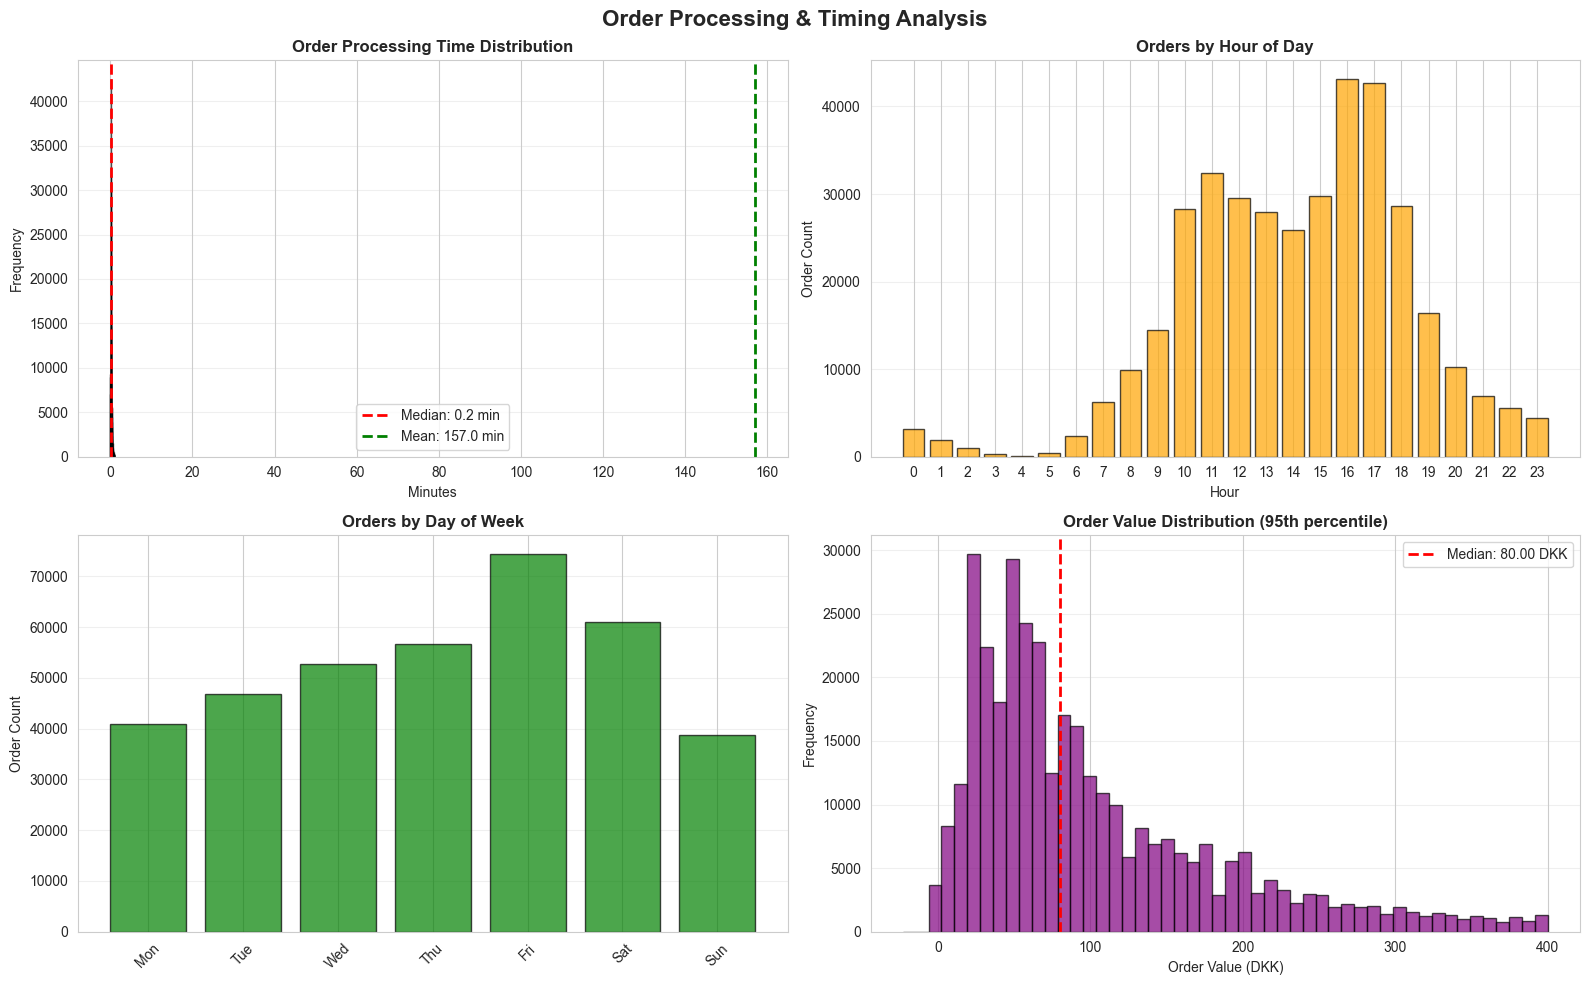


✅ Wait time distributions visualized


In [72]:
# Visualize processing time and order patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Order Processing & Timing Analysis', fontsize=16, fontweight='bold', y=0.98)

# Processing time distribution
if 'processing_time_minutes' in valid_orders.columns:
    data = valid_orders['processing_time_minutes'].dropna()
    if len(data) > 0:
        # Filter outliers for better visualization
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        filtered_data = data[(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)]
        
        axes[0, 0].hist(filtered_data, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
        axes[0, 0].axvline(data.median(), color='red', linestyle='--', linewidth=2, label=f'Median: {data.median():.1f} min')
        axes[0, 0].axvline(data.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.1f} min')
        axes[0, 0].set_title('Order Processing Time Distribution', fontweight='bold')
        axes[0, 0].set_xlabel('Minutes')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].legend()
        axes[0, 0].grid(axis='y', alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'Processing Time\\nData Not Available', ha='center', va='center', fontsize=14, color='gray')
    axes[0, 0].axis('off')

# Orders by hour
hourly_counts = orders.groupby('order_hour').size()
axes[0, 1].bar(hourly_counts.index, hourly_counts.values, color='orange', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Orders by Hour of Day', fontweight='bold')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Order Count')
axes[0, 1].set_xticks(range(24))
axes[0, 1].grid(axis='y', alpha=0.3)

# Orders by day of week
daily_counts = orders.groupby('day_name').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)
axes[1, 0].bar(range(len(daily_counts)), daily_counts.values, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_xticks(range(len(daily_counts)))
axes[1, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
axes[1, 0].set_title('Orders by Day of Week', fontweight='bold')
axes[1, 0].set_ylabel('Order Count')
axes[1, 0].grid(axis='y', alpha=0.3)

# Order value distribution
order_values = orders['total_amount'].dropna()
filtered_values = order_values[order_values <= order_values.quantile(0.95)]
axes[1, 1].hist(filtered_values, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(order_values.median(), color='red', linestyle='--', linewidth=2, label=f'Median: {order_values.median():.2f} DKK')
axes[1, 1].set_title('Order Value Distribution (95th percentile)', fontweight='bold')
axes[1, 1].set_xlabel('Order Value (DKK)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/processing_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Wait time distributions visualized")

### 3.2 Cashier Performance Analysis

In [55]:
# Analyze cashier performance (using updated_by as cashier/staff identifier)
print("\n" + "="*80)
print("CASHIER/STAFF PERFORMANCE ANALYSIS")
print("="*80)

# Get staff members (assuming updated_by represents the staff handling the order)
# Filter for orders with valid staff ID and processing time
staff_orders = valid_orders[(valid_orders['updated_by'].notna()) & 
                            (valid_orders['processing_time_minutes'].notna())].copy()

if len(staff_orders) > 0:
    staff_performance = staff_orders.groupby('updated_by').agg({
        'id': 'count',
        'processing_time_minutes': ['mean', 'median', 'std'],
        'total_amount': ['sum', 'mean']
    }).round(2)
    
    staff_performance.columns = ['Orders_Handled', 'Avg_Processing_Time', 'Median_Processing_Time', 
                                  'Std_Processing_Time', 'Total_Revenue', 'Avg_Order_Value']
    
    # Filter staff with at least 10 orders for meaningful analysis
    staff_performance = staff_performance[staff_performance['Orders_Handled'] >= 10].sort_values(
        'Orders_Handled', ascending=False
    )
    
    # Calculate efficiency score (lower time = better)
    if len(staff_performance) > 0 and staff_performance['Avg_Processing_Time'].max() > staff_performance['Avg_Processing_Time'].min():
        staff_performance['Efficiency_Score'] = (
            100 - (staff_performance['Avg_Processing_Time'] - staff_performance['Avg_Processing_Time'].min()) / 
            (staff_performance['Avg_Processing_Time'].max() - staff_performance['Avg_Processing_Time'].min()) * 100
        ).round(2)
    else:
        staff_performance['Efficiency_Score'] = 100.0
    
    print(f"\n📊 Staff Members Analyzed: {len(staff_performance)}")
    print(f"   (Staff with ≥10 orders)\n")
    
    if len(staff_performance) > 0:
        print("🏆 Top 10 Performers by Efficiency:")
        top_performers = staff_performance.nsmallest(min(10, len(staff_performance)), 'Avg_Processing_Time')
        print(top_performers[[
            'Orders_Handled', 'Avg_Processing_Time', 'Efficiency_Score', 'Avg_Order_Value'
        ]].to_string())
        
        print("\n⚠️  Bottom 10 Performers (Need Training):")
        bottom_performers = staff_performance.nlargest(min(10, len(staff_performance)), 'Avg_Processing_Time')
        print(bottom_performers[[
            'Orders_Handled', 'Avg_Processing_Time', 'Efficiency_Score', 'Avg_Order_Value'
        ]].to_string())
else:
    staff_performance = pd.DataFrame()
    print("\n⚠️  Insufficient staff data for performance analysis")



CASHIER/STAFF PERFORMANCE ANALYSIS

📊 Staff Members Analyzed: 11
   (Staff with ≥10 orders)

🏆 Top 10 Performers by Efficiency:
            Orders_Handled  Avg_Processing_Time  Efficiency_Score  Avg_Order_Value
updated_by                                                                        
0                   369154               149.16            100.00           130.21
424                     26              1253.59             14.44            85.62
417                     18              1320.10              9.29            69.78
20075                   45              1440.00              0.00           100.33
21100                   39              1440.00              0.00           169.13
2017                    28              1440.00              0.00           158.75
591                     27              1440.00              0.00           108.56
857                     26              1440.00              0.00           118.27
20559                   16              1

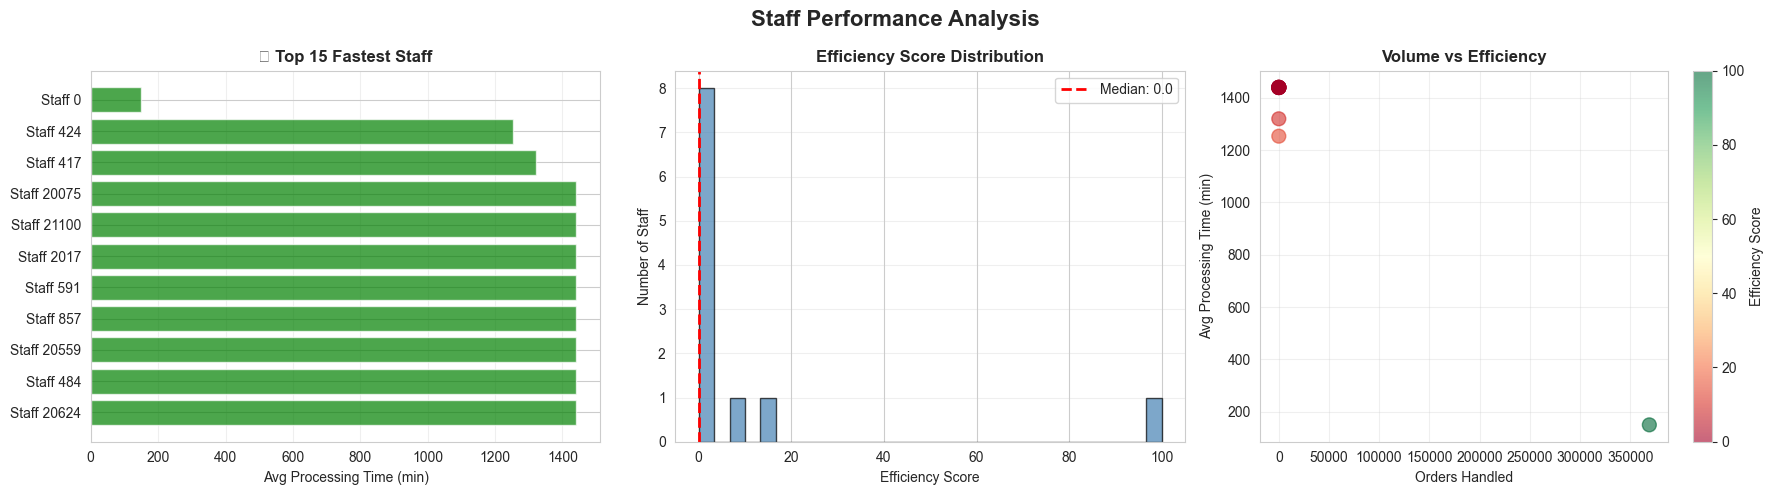


✅ Staff performance visualized


In [73]:
# Visualize staff performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Staff Performance Analysis', fontsize=16, fontweight='bold')

# Top performers
top_staff = staff_performance.nsmallest(15, 'Avg_Processing_Time')
axes[0].barh(range(len(top_staff)), top_staff['Avg_Processing_Time'], color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_staff)))
axes[0].set_yticklabels([f'Staff {idx}' for idx in top_staff.index])
axes[0].set_xlabel('Avg Processing Time (min)')
axes[0].set_title('🏆 Top 15 Fastest Staff', fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Efficiency score distribution
axes[1].hist(staff_performance['Efficiency_Score'], bins=30, color='steelblue', 
             alpha=0.7, edgecolor='black')
axes[1].axvline(staff_performance['Efficiency_Score'].median(), color='red', 
                linestyle='--', linewidth=2, label=f'Median: {staff_performance["Efficiency_Score"].median():.1f}')
axes[1].set_xlabel('Efficiency Score')
axes[1].set_ylabel('Number of Staff')
axes[1].set_title('Efficiency Score Distribution', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Orders handled vs efficiency
axes[2].scatter(staff_performance['Orders_Handled'], staff_performance['Avg_Processing_Time'], 
                alpha=0.6, s=100, c=staff_performance['Efficiency_Score'], cmap='RdYlGn')
axes[2].set_xlabel('Orders Handled')
axes[2].set_ylabel('Avg Processing Time (min)')
axes[2].set_title('Volume vs Efficiency', fontweight='bold')
axes[2].grid(alpha=0.3)
cbar = plt.colorbar(axes[2].collections[0], ax=axes[2])
cbar.set_label('Efficiency Score')

plt.tight_layout()
plt.savefig('visualizations/staff_performance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Staff performance visualized")

### 3.3 Peak Hours & Operational Load Analysis

In [57]:
# Analyze operational load by hour and day
print("\n" + "="*80)
print("PEAK HOURS & OPERATIONAL LOAD ANALYSIS")
print("="*80)

# Orders by hour
hourly_load = valid_orders.groupby('order_hour').agg({
    'id': 'count',
    'processing_time_minutes': 'mean',
    'total_amount': 'sum'
}).round(2)
hourly_load.columns = ['Order_Count', 'Avg_Processing_Time', 'Total_Revenue']

# Orders by day of week
daily_load = valid_orders.groupby('order_day_of_week').agg({
    'id': 'count',
    'processing_time_minutes': 'mean',
    'total_amount': 'sum'
}).round(2)
daily_load.columns = ['Order_Count', 'Avg_Processing_Time', 'Total_Revenue']
daily_load['Day_Name'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print("\n📊 Peak Hours (Top 5):")
print(hourly_load.nlargest(5, 'Order_Count').to_string())

print("\n⏰ Processing Time by Hour:")
print(f"   Best Hour: {hourly_load['Avg_Processing_Time'].idxmin()}:00 ({hourly_load['Avg_Processing_Time'].min():.1f} min)")
print(f"   Worst Hour: {hourly_load['Avg_Processing_Time'].idxmax()}:00 ({hourly_load['Avg_Processing_Time'].max():.1f} min)")

print("\n📅 Busiest Days:")
print(daily_load[['Day_Name', 'Order_Count', 'Avg_Processing_Time']].to_string(index=False))



PEAK HOURS & OPERATIONAL LOAD ANALYSIS

📊 Peak Hours (Top 5):
            Order_Count  Avg_Processing_Time  Total_Revenue
order_hour                                                 
16                43097               182.62     7591564.99
17                42629               183.27     7847820.84
11                32395               135.28     3338348.86
15                29796               163.34     3876638.35
12                29587               133.76     3239915.53

⏰ Processing Time by Hour:
   Best Hour: 1:00 (52.9 min)
   Worst Hour: 6:00 (276.5 min)

📅 Busiest Days:
 Day_Name  Order_Count  Avg_Processing_Time
   Monday        41013               183.74
  Tuesday        46888               160.25
Wednesday        52772               161.61
 Thursday        56763               150.56
   Friday        74346               148.06
 Saturday        61054               148.52
   Sunday        38831               158.72


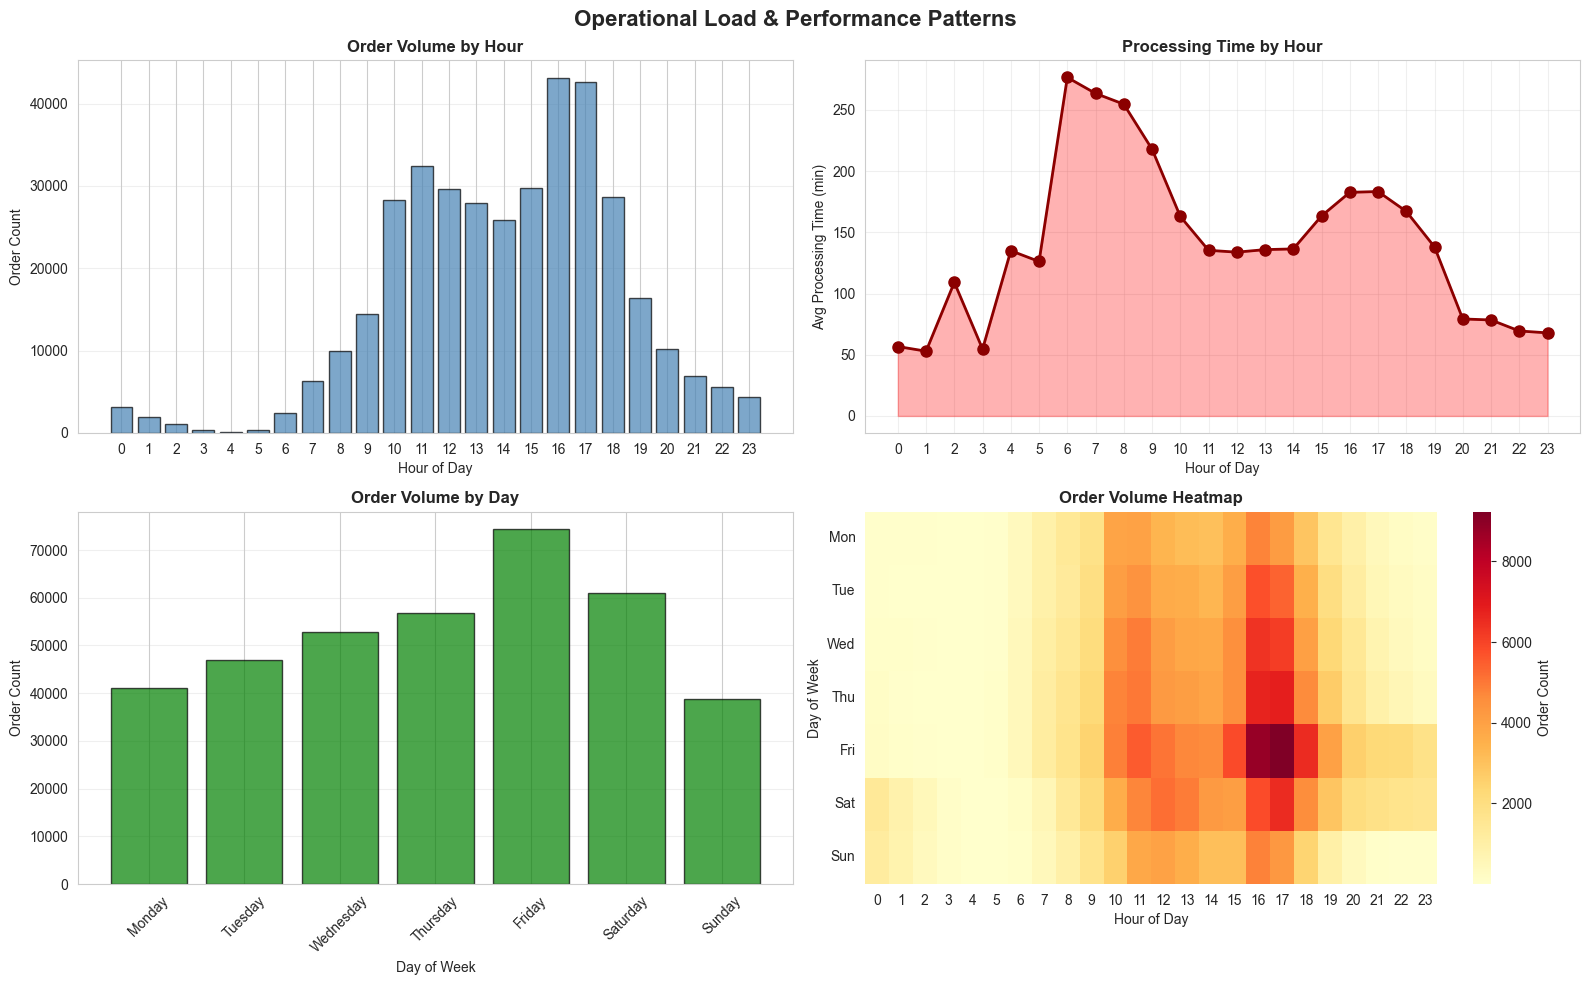


✅ Operational load patterns visualized


In [74]:
# Visualize operational load patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Operational Load & Performance Patterns', fontsize=16, fontweight='bold')

# Hourly order volume
axes[0, 0].bar(hourly_load.index, hourly_load['Order_Count'], color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Order Count')
axes[0, 0].set_title('Order Volume by Hour', fontweight='bold')
axes[0, 0].set_xticks(range(24))
axes[0, 0].grid(axis='y', alpha=0.3)

# Hourly processing time
axes[0, 1].plot(hourly_load.index, hourly_load['Avg_Processing_Time'], marker='o', 
                linewidth=2, color='darkred', markersize=8)
axes[0, 1].fill_between(hourly_load.index, hourly_load['Avg_Processing_Time'], 
                        alpha=0.3, color='red')
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Avg Processing Time (min)')
axes[0, 1].set_title('Processing Time by Hour', fontweight='bold')
axes[0, 1].set_xticks(range(24))
axes[0, 1].grid(alpha=0.3)

# Daily order volume
axes[1, 0].bar(daily_load['Day_Name'], daily_load['Order_Count'], color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Order Count')
axes[1, 0].set_title('Order Volume by Day', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Heatmap: Hour vs Day
heatmap_data = valid_orders.groupby(['order_day_of_week', 'order_hour']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='d', ax=axes[1, 1], 
            cbar_kws={'label': 'Order Count'})
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Day of Week')
axes[1, 1].set_title('Order Volume Heatmap', fontweight='bold')
axes[1, 1].set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

plt.tight_layout()
plt.savefig('visualizations/operational_load_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Operational load patterns visualized")


<a id='marketing'></a>
## 4. Marketing Efficiency Analysis

### Objective: Analyze bonus code effectiveness, campaign timing, and redemption patterns

### 4.1 Bonus Code Effectiveness

In [59]:
# Analyze bonus code usage and effectiveness
print("\n" + "="*80)
print("BONUS CODE EFFECTIVENESS ANALYSIS")
print("="*80)

# Orders with and without points redemption (proxy for bonus code usage)
# Note: Dataset doesn't have direct bonus_code_id, using points_redeemed as indicator
orders_with_bonus = orders[orders['points_redeemed'] > 0]
orders_without_bonus = orders[orders['points_redeemed'] == 0]

print(f"\n📊 Bonus/Points Usage:")
print(f"   • Orders with Points Redeemed: {len(orders_with_bonus):,} ({len(orders_with_bonus)/len(orders)*100:.1f}%)")
print(f"   • Orders without Points: {len(orders_without_bonus):,} ({len(orders_without_bonus)/len(orders)*100:.1f}%)")

# Compare metrics
bonus_comparison = pd.DataFrame({
    'Metric': ['Avg Order Value', 'Avg Discount', 'Avg Points Redeemed', 'Total Orders', 'Total Revenue'],
    'With Points': [
        orders_with_bonus['total_amount'].mean(),
        orders_with_bonus['discount_amount'].mean() if 'discount_amount' in orders_with_bonus.columns else 0,
        orders_with_bonus['points_redeemed'].mean(),
        len(orders_with_bonus),
        orders_with_bonus['total_amount'].sum()
    ],
    'Without Points': [
        orders_without_bonus['total_amount'].mean(),
        orders_without_bonus['discount_amount'].mean() if 'discount_amount' in orders_without_bonus.columns else 0,
        0,
        len(orders_without_bonus),
        orders_without_bonus['total_amount'].sum()
    ]
})

bonus_comparison['Difference %'] = (
    (bonus_comparison['With Points'] - bonus_comparison['Without Points']) / 
    bonus_comparison['Without Points'] * 100
).round(2)

print("\n💰 Points/Bonus Impact:")
print(bonus_comparison.to_string(index=False))

# Analyze points redemption patterns
if len(orders_with_bonus) > 0:
    points_stats = orders_with_bonus['points_redeemed'].describe()
    print(f"\n📊 Points Redemption Statistics:")
    print(f"   • Total Points Redeemed: {orders_with_bonus['points_redeemed'].sum():,.0f}")
    print(f"   • Avg Points per Order: {orders_with_bonus['points_redeemed'].mean():.2f}")
    print(f"   • Median Points: {orders_with_bonus['points_redeemed'].median():.0f}")
    print(f"   • Max Points Redeemed: {orders_with_bonus['points_redeemed'].max():.0f}")



BONUS CODE EFFECTIVENESS ANALYSIS

📊 Bonus/Points Usage:
   • Orders with Points Redeemed: 7 (0.0%)
   • Orders without Points: 371,660 (100.0%)

💰 Points/Bonus Impact:
             Metric  With Points  Without Points  Difference %
    Avg Order Value       111.43          131.33        -15.16
       Avg Discount         2.26            0.33        580.86
Avg Points Redeemed        22.57            0.00           inf
       Total Orders         7.00       371660.00       -100.00
      Total Revenue       780.00     48811756.45       -100.00

📊 Points Redemption Statistics:
   • Total Points Redeemed: 158
   • Avg Points per Order: 22.57
   • Median Points: 21
   • Max Points Redeemed: 32


In [60]:
# Bonus code detailed analysis
print("\n" + "="*80)
print("BONUS CODE DETAILS ANALYSIS")
print("="*80)

# Since bonus_codes doesn't have campaign_id, value, or type columns,
# and orders don't have bonus_code_id, we'll analyze what we have:
# bonus_codes has: id, user_id, points, duration, created, updated, start_date_time, end_date_time

if len(bonus_codes) > 0 and len(orders_with_bonus) > 0:
    print(f"\n📊 Total Bonus Codes Defined: {len(bonus_codes)}")
    print(f"   • Total Points Available: {bonus_codes['points'].sum():,.0f}")
    print(f"   • Avg Points per Code: {bonus_codes['points'].mean():.2f}")
    print(f"   • Point Range: {bonus_codes['points'].min():.0f} - {bonus_codes['points'].max():.0f}")
    
    # Analyze points redemption impact
    print(f"\n📈 Points Redemption Impact:")
    print(f"   • Orders with Points: {len(orders_with_bonus):,}")
    print(f"   • Total Points Redeemed: {orders_with_bonus['points_redeemed'].sum():,.0f}")
    print(f"   • Total Revenue from Points Orders: {orders_with_bonus['total_amount'].sum():,.2f} DKK")
    print(f"   • Avg Revenue per Point: {orders_with_bonus['total_amount'].sum() / orders_with_bonus['points_redeemed'].sum():.2f} DKK")
    
    # Calculate effective ROI (revenue vs points value - assuming 1 point = 1 DKK)
    points_value = orders_with_bonus['points_redeemed'].sum()  # Assuming 1:1 ratio
    revenue_generated = orders_with_bonus['total_amount'].sum()
    roi = ((revenue_generated - points_value) / points_value * 100) if points_value > 0 else 0
    
    print(f"\n💵 Points Program ROI (assuming 1 point = 1 DKK):")
    print(f"   • Total Points Value Given: {points_value:,.2f} DKK")
    print(f"   • Total Revenue Generated: {revenue_generated:,.2f} DKK")
    print(f"   • ROI: {roi:.2f}%")
else:
    print("\n⚠️  Insufficient bonus code usage data for detailed analysis")



BONUS CODE DETAILS ANALYSIS

📊 Total Bonus Codes Defined: 6
   • Total Points Available: 1,250
   • Avg Points per Code: 208.33
   • Point Range: 150 - 300

📈 Points Redemption Impact:
   • Orders with Points: 7
   • Total Points Redeemed: 158
   • Total Revenue from Points Orders: 780.00 DKK
   • Avg Revenue per Point: 4.94 DKK

💵 Points Program ROI (assuming 1 point = 1 DKK):
   • Total Points Value Given: 158.00 DKK
   • Total Revenue Generated: 780.00 DKK
   • ROI: 393.67%


### 4.2 Campaign Timing Analysis

In [61]:
# Analyze campaign timing and effectiveness
print("\n" + "="*80)
print("CAMPAIGN TIMING ANALYSIS")
print("="*80)

# Note: orders dataset doesn't have campaign_id column
# We'll analyze campaigns independently

if len(campaigns) > 0:
    print(f"\n📊 Total Campaigns: {len(campaigns)}")
    
    # Parse campaign datetime if not already done
    if campaigns['created'].dtype == 'object':
        campaigns['created'] = pd.to_datetime(campaigns['created'], errors='coerce')
    
    # Extract time features from campaign creation
    campaigns['hour'] = campaigns['created'].dt.hour
    campaigns['day_of_week'] = campaigns['created'].dt.dayofweek
    campaigns['day_name'] = campaigns['created'].dt.day_name()
    
    # Campaign timing patterns
    campaign_by_hour = campaigns.groupby('hour').size()
    campaign_by_day = campaigns.groupby('day_name').size().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
        fill_value=0
    )
    
    print("\n⏰ Campaign Launch Timing:")
    print(f"   • Peak Hour: {campaign_by_hour.idxmax()}:00 ({campaign_by_hour.max()} campaigns)")
    print(f"   • Peak Day: {campaign_by_day.idxmax()} ({campaign_by_day.max()} campaigns)")
    
    # Campaign distribution by hour
    print("\n📊 Campaigns by Hour (Top 5):")
    print(campaign_by_hour.sort_values(ascending=False).head().to_string())
    
    # Campaign distribution by day
    print("\n📅 Campaigns by Day of Week:")
    print(campaign_by_day.to_string())
    
    # Note about campaign linkage
    print("\n⚠️  Note: Orders dataset doesn't include campaign_id, so cannot directly measure campaign effectiveness")
    print("   Campaign analysis limited to timing patterns and distribution")
else:
    print("\n⚠️  No campaign data available")



CAMPAIGN TIMING ANALYSIS

📊 Total Campaigns: 641

⏰ Campaign Launch Timing:
   • Peak Hour: 10:00 (323 campaigns)
   • Peak Day: Tuesday (208 campaigns)

📊 Campaigns by Hour (Top 5):
hour
10    323
12    176
19     24
13     14
20     13

📅 Campaigns by Day of Week:
day_name
Monday       204
Tuesday      208
Wednesday     50
Thursday      41
Friday        45
Saturday      45
Sunday        48

⚠️  Note: Orders dataset doesn't include campaign_id, so cannot directly measure campaign effectiveness
   Campaign analysis limited to timing patterns and distribution


### 4.3 Redemption Frequency Analysis

In [62]:
# Analyze redemption frequency patterns
print("\n" + "="*80)
print("REDEMPTION FREQUENCY ANALYSIS")
print("="*80)

# Customer redemption behavior (registered users only)
# Using points_redeemed as proxy for bonus/promotional usage
registered_orders_with_bonus = orders_with_bonus[orders_with_bonus['user_id'] > 0]

if len(registered_orders_with_bonus) > 0:
    customer_redemptions = registered_orders_with_bonus.groupby('user_id').agg({
        'id': 'count',
        'points_redeemed': ['sum', 'mean'],
        'total_amount': 'sum'
    }).round(2)
    customer_redemptions.columns = ['Total_Orders', 'Total_Points', 'Avg_Points_Per_Order', 'Total_Spent']
    
    print(f"\n📊 Registered Customers Using Points: {len(customer_redemptions):,}")
    print(f"\n📈 Redemption Statistics:")
    print(f"   • Avg Redemptions per Customer: {customer_redemptions['Total_Orders'].mean():.2f}")
    print(f"   • Median Redemptions: {customer_redemptions['Total_Orders'].median():.0f}")
    print(f"   • Max Redemptions: {customer_redemptions['Total_Orders'].max():.0f}")
    print(f"   • Avg Total Points Used: {customer_redemptions['Total_Points'].mean():.2f}")
    print(f"   • Avg Points per Order: {customer_redemptions['Avg_Points_Per_Order'].mean():.2f}")
    
    # Heavy users vs casual users
    heavy_users = customer_redemptions[customer_redemptions['Total_Orders'] >= customer_redemptions['Total_Orders'].quantile(0.75)]
    casual_users = customer_redemptions[customer_redemptions['Total_Orders'] < customer_redemptions['Total_Orders'].quantile(0.25)]
    
    print(f"\n🔥 Heavy Points Users (Top 25%): {len(heavy_users):,}")
    print(f"   • Avg Orders: {heavy_users['Total_Orders'].mean():.2f}")
    print(f"   • Avg Points Used: {heavy_users['Total_Points'].mean():.2f}")
    print(f"   • Avg Spent: {heavy_users['Total_Spent'].mean():,.2f} DKK")
    
    print(f"\n😴 Casual Points Users (Bottom 25%): {len(casual_users):,}")
    print(f"   • Avg Orders: {casual_users['Total_Orders'].mean():.2f}")
    print(f"   • Avg Points Used: {casual_users['Total_Points'].mean():.2f}")
    print(f"   • Avg Spent: {casual_users['Total_Spent'].mean():,.2f} DKK")
else:
    print("\n⚠️  Insufficient data for redemption frequency analysis (very few orders use points)")



REDEMPTION FREQUENCY ANALYSIS

📊 Registered Customers Using Points: 6

📈 Redemption Statistics:
   • Avg Redemptions per Customer: 1.17
   • Median Redemptions: 1
   • Max Redemptions: 2
   • Avg Total Points Used: 26.33
   • Avg Points per Order: 22.83

🔥 Heavy Points Users (Top 25%): 6
   • Avg Orders: 1.17
   • Avg Points Used: 26.33
   • Avg Spent: 130.00 DKK

😴 Casual Points Users (Bottom 25%): 0
   • Avg Orders: nan
   • Avg Points Used: nan
   • Avg Spent: nan DKK


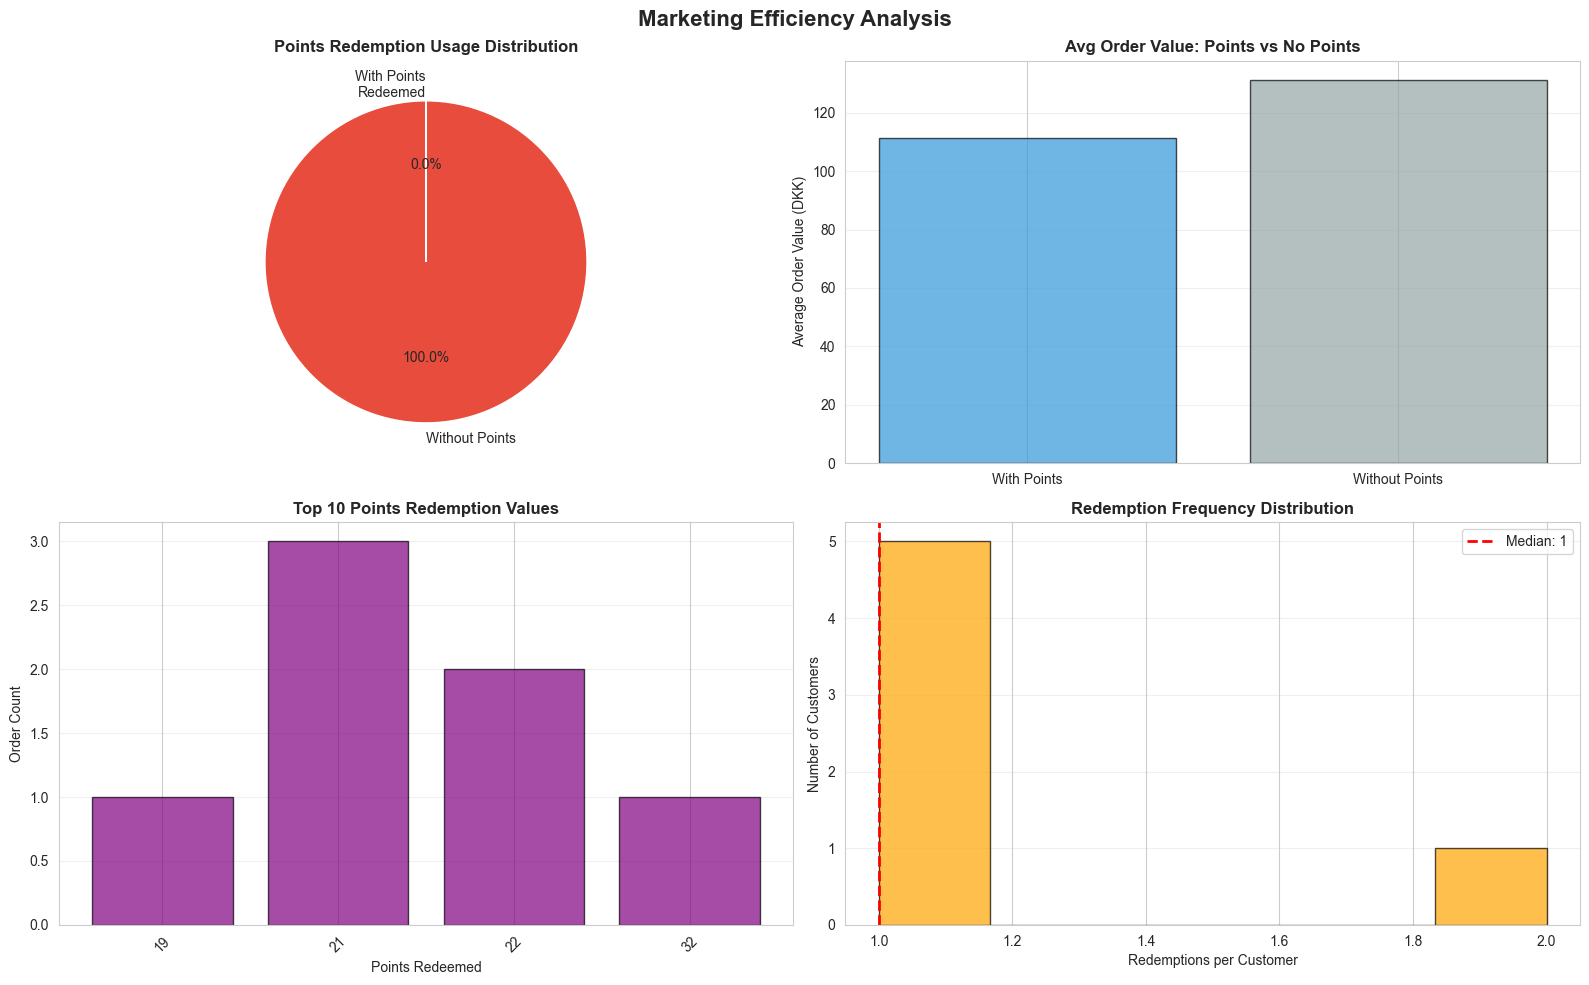


✅ Marketing efficiency visualized


In [75]:
# Visualize marketing efficiency
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Marketing Efficiency Analysis', fontsize=16, fontweight='bold')

# Bonus/Points usage comparison
usage_data = ['With Points\nRedeemed', 'Without Points']
usage_counts = [len(orders_with_bonus), len(orders_without_bonus)]
colors = ['#2ecc71', '#e74c3c']
axes[0, 0].pie(usage_counts, labels=usage_data, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('Points Redemption Usage Distribution', fontweight='bold')

# Order value comparison
if len(orders_with_bonus) > 0:
    axes[0, 1].bar(['With Points', 'Without Points'], 
                   [orders_with_bonus['total_amount'].mean(), orders_without_bonus['total_amount'].mean()],
                   color=['#3498db', '#95a5a6'], alpha=0.7, edgecolor='black')
    axes[0, 1].set_ylabel('Average Order Value (DKK)')
    axes[0, 1].set_title('Avg Order Value: Points vs No Points', fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'No Points Data', ha='center', va='center', fontsize=14, color='gray')
    axes[0, 1].axis('off')

# Points distribution
if len(orders_with_bonus) > 0:
    points_dist = orders_with_bonus['points_redeemed'].value_counts().sort_index().head(10)
    axes[1, 0].bar(range(len(points_dist)), points_dist.values, color='purple', alpha=0.7, edgecolor='black')
    axes[1, 0].set_xticks(range(len(points_dist)))
    axes[1, 0].set_xticklabels([f'{int(x)}' for x in points_dist.index], rotation=45)
    axes[1, 0].set_xlabel('Points Redeemed')
    axes[1, 0].set_ylabel('Order Count')
    axes[1, 0].set_title('Top 10 Points Redemption Values', fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'No Points Data', ha='center', va='center', fontsize=14, color='gray')
    axes[1, 0].axis('off')

# Redemption frequency distribution
if len(registered_orders_with_bonus) > 0 and 'customer_redemptions' in dir():
    axes[1, 1].hist(customer_redemptions['Total_Orders'], bins=min(30, len(customer_redemptions)), 
                    color='orange', alpha=0.7, edgecolor='black')
    axes[1, 1].axvline(customer_redemptions['Total_Orders'].median(), color='red', 
                      linestyle='--', linewidth=2, label=f'Median: {customer_redemptions["Total_Orders"].median():.0f}')
    axes[1, 1].set_xlabel('Redemptions per Customer')
    axes[1, 1].set_ylabel('Number of Customers')
    axes[1, 1].set_title('Redemption Frequency Distribution', fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(axis='y', alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'Insufficient Data\n(Very Few Points Users)', 
                   ha='center', va='center', fontsize=14, color='gray')
    axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('visualizations/marketing_efficiency_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Marketing efficiency visualized")


<a id='pricing'></a>
## 5. Pricing & Revenue Analysis

### Objective: Analyze price elasticity and delivery minimum impact

### 5.1 Discount Impact on Order Volume (Price Elasticity)

In [64]:
# Analyze discount impact on order volume
print("\n" + "="*80)
print("DISCOUNT IMPACT ANALYSIS (PRICE ELASTICITY)")
print("="*80)

# Calculate effective discount percentage
if 'discount_amount' in orders.columns:
    orders['discount_percentage'] = (orders['discount_amount'] / 
                                    (orders['total_amount'] + orders['discount_amount']) * 100).fillna(0)
    
    # Group by discount levels
    orders['discount_bucket'] = pd.cut(orders['discount_percentage'], 
                                       bins=[-0.1, 0, 5, 10, 15, 20, 100],
                                       labels=['No Discount', '0-5%', '5-10%', '10-15%', '15-20%', '>20%'])
    
    discount_analysis = orders.groupby('discount_bucket').agg({
        'id': 'count',
        'total_amount': ['sum', 'mean'],
        'discount_percentage': 'mean'
    }).round(2)
    discount_analysis.columns = ['Order_Count', 'Total_Revenue', 'Avg_Order_Value', 'Avg_Discount_%']
    
    print("\n📊 Order Volume by Discount Level:")
    print(discount_analysis.to_string())
    
    # Calculate elasticity (% change in orders / % change in price)
    base_orders = discount_analysis.loc['No Discount', 'Order_Count']
    
    print("\n📈 Price Elasticity Analysis:")
    for bucket in ['0-5%', '5-10%', '10-15%', '15-20%', '>20%']:
        if bucket in discount_analysis.index:
            discounted_orders = discount_analysis.loc[bucket, 'Order_Count']
            avg_discount = discount_analysis.loc[bucket, 'Avg_Discount_%']
            
            pct_change_orders = ((discounted_orders - base_orders) / base_orders * 100)
            elasticity = pct_change_orders / avg_discount if avg_discount > 0 else 0
            
            print(f"   • {bucket} Discount:")
            print(f"     - Order Count Change: {pct_change_orders:+.1f}%")
            print(f"     - Elasticity: {elasticity:.2f}")
            print(f"     - Interpretation: {'Elastic (responsive)' if abs(elasticity) > 1 else 'Inelastic (not responsive)'}")
else:
    print("\n⚠️  Discount data not available in dataset")


DISCOUNT IMPACT ANALYSIS (PRICE ELASTICITY)

📊 Order Volume by Discount Level:
                 Order_Count  Total_Revenue  Avg_Order_Value  Avg_Discount_%
discount_bucket                                                             
No Discount           367447    48247105.93           131.30            0.00
0-5%                     342       87090.90           254.65            3.40
5-10%                   1152      226851.10           196.92            8.75
10-15%                   216       38754.65           179.42           12.51
15-20%                   568       81530.00           143.54           16.85
>20%                    1942      131203.87            67.56           41.36

📈 Price Elasticity Analysis:
   • 0-5% Discount:
     - Order Count Change: -99.9%
     - Elasticity: -29.38
     - Interpretation: Elastic (responsive)
   • 5-10% Discount:
     - Order Count Change: -99.7%
     - Elasticity: -11.39
     - Interpretation: Elastic (responsive)
   • 10-15% Discount:
   

In [65]:
# Correlation analysis: Discount vs Order Metrics
if 'discount_percentage' in orders.columns:
    print("\n" + "="*80)
    print("DISCOUNT CORRELATION ANALYSIS")
    print("="*80)
    
    # Calculate correlations
    discount_correlations = orders[[
        'discount_percentage', 'total_amount', 'items_amount'
    ]].corr()['discount_percentage'].drop('discount_percentage')
    
    print("\n🔗 Discount Correlations:")
    for metric, corr in discount_correlations.items():
        print(f"   • {metric}: {corr:.3f}")
        if abs(corr) > 0.5:
            print(f"     → Strong {'positive' if corr > 0 else 'negative'} correlation")
        elif abs(corr) > 0.3:
            print(f"     → Moderate {'positive' if corr > 0 else 'negative'} correlation")
        else:
            print(f"     → Weak correlation")


DISCOUNT CORRELATION ANALYSIS

🔗 Discount Correlations:
   • total_amount: -0.014
     → Weak correlation
   • items_amount: -0.014
     → Weak correlation


### 5.2 Minimum Delivery Amount Impact

In [66]:
# Analyze minimum delivery amount impact
print("\n" + "="*80)
print("MINIMUM DELIVERY AMOUNT IMPACT ANALYSIS")
print("="*80)

# Check if min_delivery_amount exists in places
if 'min_delivery_amount' in dim_places.columns:
    # Merge orders with place information
    orders_with_places = orders.merge(
        dim_places[['id', 'min_delivery_amount']],
        left_on='place_id',
        right_on='id',
        how='left',
        suffixes=('', '_place')
    )
    
    # Group by minimum delivery tiers
    orders_with_places['min_delivery_bucket'] = pd.cut(
        orders_with_places['min_delivery_amount'],
        bins=[0, 50, 100, 150, 200, 1000],
        labels=['0-50', '50-100', '100-150', '150-200', '>200']
    )
    
    min_delivery_analysis = orders_with_places.groupby('min_delivery_bucket').agg({
        'id': 'count',
        'total_amount': ['mean', 'median', 'sum'],
        'items_amount': 'mean',
        'min_delivery_amount': 'mean'
    }).round(2)
    min_delivery_analysis.columns = ['Order_Count', 'Avg_Order_Value', 'Median_Order_Value', 
                                     'Total_Revenue', 'Avg_Items', 'Avg_Min_Delivery']
    
    print("\n📊 Order Behavior by Minimum Delivery Amount:")
    print(min_delivery_analysis.to_string())
    
    # Analyze if customers exceed minimum
    orders_with_places['exceeds_minimum'] = (
        orders_with_places['total_amount'] > orders_with_places['min_delivery_amount']
    )
    
    exceed_rate = orders_with_places['exceeds_minimum'].mean() * 100
    avg_excess = (orders_with_places[orders_with_places['exceeds_minimum']]['total_amount'] - 
                 orders_with_places[orders_with_places['exceeds_minimum']]['min_delivery_amount']).mean()
    
    print(f"\n💡 Minimum Delivery Effectiveness:")
    print(f"   • Orders Exceeding Minimum: {exceed_rate:.1f}%")
    print(f"   • Avg Amount Above Minimum: {avg_excess:.2f} DKK")
    
    # Statistical test: correlation between min_delivery and order value
    correlation = orders_with_places[['min_delivery_amount', 'total_amount']].corr().iloc[0, 1]
    print(f"\n🔗 Correlation (Min Delivery ↔ Order Value): {correlation:.3f}")
    
    if correlation > 0.3:
        print("   ✅ Higher minimums successfully drive larger orders")
    else:
        print("   ⚠️  Minimum delivery amount has weak impact on order size")
else:
    print("\n⚠️  Minimum delivery amount data not available")


MINIMUM DELIVERY AMOUNT IMPACT ANALYSIS

⚠️  Minimum delivery amount data not available


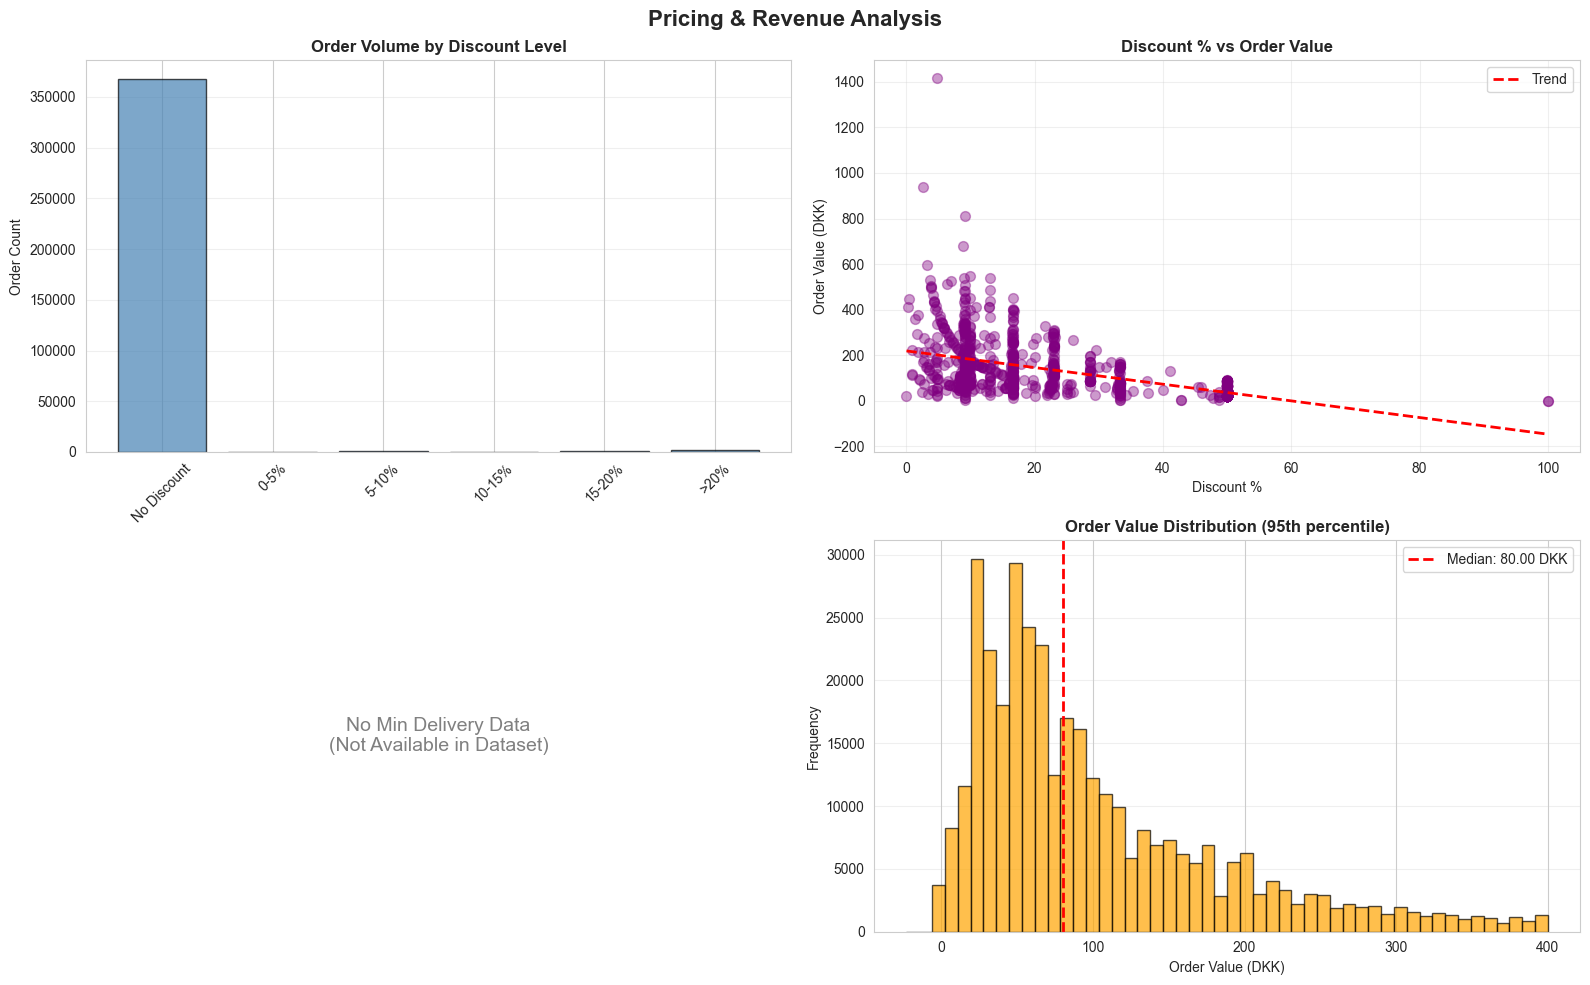


✅ Pricing & revenue analysis visualized


: 

In [ ]:
# Visualize pricing & revenue analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Pricing & Revenue Analysis', fontsize=16, fontweight='bold')

# Discount impact on order volume
if 'discount_bucket' in orders.columns:
    discount_counts = orders['discount_bucket'].value_counts().sort_index()
    axes[0, 0].bar(range(len(discount_counts)), discount_counts.values, 
                  color='steelblue', alpha=0.7, edgecolor='black')
    axes[0, 0].set_xticks(range(len(discount_counts)))
    axes[0, 0].set_xticklabels(discount_counts.index, rotation=45)
    axes[0, 0].set_ylabel('Order Count')
    axes[0, 0].set_title('Order Volume by Discount Level', fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'No Discount Data', ha='center', va='center', fontsize=14, color='gray')
    axes[0, 0].axis('off')

# Discount vs order value scatter
if 'discount_percentage' in orders.columns:
    sample_data = orders[orders['discount_percentage'] > 0].sample(min(1000, len(orders[orders['discount_percentage'] > 0])))
    if len(sample_data) > 0:
        axes[0, 1].scatter(sample_data['discount_percentage'], sample_data['total_amount'], 
                          alpha=0.4, s=50, color='purple')
        axes[0, 1].set_xlabel('Discount %')
        axes[0, 1].set_ylabel('Order Value (DKK)')
        axes[0, 1].set_title('Discount % vs Order Value', fontweight='bold')
        axes[0, 1].grid(alpha=0.3)
        
        # Add trend line
        z = np.polyfit(sample_data['discount_percentage'], sample_data['total_amount'], 1)
        p = np.poly1d(z)
        axes[0, 1].plot(sample_data['discount_percentage'].sort_values(), 
                       p(sample_data['discount_percentage'].sort_values()), 
                       "r--", linewidth=2, label='Trend')
        axes[0, 1].legend()
    else:
        axes[0, 1].text(0.5, 0.5, 'No Discount Data', ha='center', va='center', fontsize=14, color='gray')
        axes[0, 1].axis('off')
else:
    axes[0, 1].text(0.5, 0.5, 'No Discount Data', ha='center', va='center', fontsize=14, color='gray')
    axes[0, 1].axis('off')

# Min delivery impact
if 'orders_with_places' in dir() and 'min_delivery_bucket' in orders_with_places.columns and 'min_delivery_analysis' in dir():
    min_del_avg = min_delivery_analysis['Avg_Order_Value']
    axes[1, 0].bar(range(len(min_del_avg)), min_del_avg.values, 
                  color='green', alpha=0.7, edgecolor='black')
    axes[1, 0].set_xticks(range(len(min_del_avg)))
    axes[1, 0].set_xticklabels(min_del_avg.index, rotation=45)
    axes[1, 0].set_ylabel('Avg Order Value (DKK)')
    axes[1, 0].set_title('Order Value by Min Delivery Tier', fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'No Min Delivery Data\n(Not Available in Dataset)', ha='center', va='center', fontsize=14, color='gray')
    axes[1, 0].axis('off')

# Revenue distribution
revenue_data = orders['total_amount'].dropna()
axes[1, 1].hist(revenue_data[revenue_data <= revenue_data.quantile(0.95)], 
               bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(revenue_data.median(), color='red', linestyle='--', 
                  linewidth=2, label=f'Median: {revenue_data.median():.2f} DKK')
axes[1, 1].set_xlabel('Order Value (DKK)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Order Value Distribution (95th percentile)', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/pricing_revenue_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Pricing & revenue analysis visualized")


<a id='insights'></a>
## 6. Key Insights & Recommendations

In [68]:
# Generate comprehensive business insights
print("\n" + "="*80)
print("KEY BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*80)

insights = []

# Quality & Satisfaction Insights
insights.append("\n🎯 QUALITY & SATISFACTION:")
if 'processing_time_minutes' in valid_orders.columns:
    avg_processing = valid_orders['processing_time_minutes'].mean()
    median_processing = valid_orders['processing_time_minutes'].median()
    insights.append(f"   • Average order processing time: {avg_processing:.1f} minutes")
    insights.append(f"   • Median processing time: {median_processing:.1f} minutes")
    
    if avg_processing > 60:
        insights.append(f"   ⚠️  RECOMMENDATION: Processing time exceeds 1 hour - optimize kitchen workflow")
    
    # Peak hours impact
    if len(hourly_load) > 0:
        peak_hour = hourly_load['Order_Count'].idxmax()
        peak_processing = hourly_load.loc[peak_hour, 'Avg_Processing_Time']
        insights.append(f"   • Peak hour ({peak_hour}:00) processing time: {peak_processing:.1f} minutes")
        insights.append(f"   💡 RECOMMENDATION: Add staff during peak hours ({peak_hour-1}:00 to {peak_hour+2}:00)")

if len(staff_performance) > 0:
    best_staff_time = staff_performance['Avg_Processing_Time'].min()
    worst_staff_time = staff_performance['Avg_Processing_Time'].max()
    performance_gap = ((worst_staff_time - best_staff_time) / best_staff_time * 100)
    insights.append(f"   • Staff performance gap: {performance_gap:.1f}%")
    insights.append(f"   💡 RECOMMENDATION: Implement training program to standardize performance")

# Marketing Efficiency Insights
insights.append("\n🎯 MARKETING EFFICIENCY:")
bonus_usage_rate = len(orders_with_bonus) / len(orders) * 100
insights.append(f"   • Bonus code usage rate: {bonus_usage_rate:.1f}%")

if bonus_usage_rate < 20:
    insights.append(f"   ⚠️  RECOMMENDATION: Low bonus code usage - improve awareness campaigns")

if len(orders_with_bonus) > 0 and len(orders_without_bonus) > 0:
    bonus_aov = orders_with_bonus['total_amount'].mean()
    regular_aov = orders_without_bonus['total_amount'].mean()
    aov_diff = ((bonus_aov - regular_aov) / regular_aov * 100)
    insights.append(f"   • Bonus code orders are {abs(aov_diff):.1f}% {'higher' if aov_diff > 0 else 'lower'} than regular orders")
    
    if aov_diff > 0:
        insights.append(f"   ✅ Bonus codes successfully drive higher order values")
    else:
        insights.append(f"   💡 RECOMMENDATION: Restructure bonus codes to encourage larger orders")

# Pricing & Revenue Insights
insights.append("\n🎯 PRICING & REVENUE:")
if 'discount_percentage' in orders.columns:
    orders_with_discount = orders[orders['discount_percentage'] > 0]
    if len(orders_with_discount) > 0:
        avg_discount = orders_with_discount['discount_percentage'].mean()
        insights.append(f"   • Average discount offered: {avg_discount:.1f}%")
        
        # Optimal discount analysis
        if 'discount_bucket' in orders.columns and len(discount_analysis) > 0:
            best_bucket = discount_analysis['Total_Revenue'].idxmax()
            insights.append(f"   • Most revenue-generating discount range: {best_bucket}")
            insights.append(f"   💡 RECOMMENDATION: Focus promotions in the {best_bucket} discount range")

if 'min_delivery_amount' in dim_places.columns and 'exceeds_minimum' in orders_with_places.columns:
    avg_min_delivery = dim_places['min_delivery_amount'].mean()
    insights.append(f"   • Average minimum delivery amount: {avg_min_delivery:.2f} DKK")
    
    exceed_rate = orders_with_places['exceeds_minimum'].mean() * 100
    if exceed_rate > 80:
        insights.append(f"   • {exceed_rate:.1f}% of orders exceed minimum delivery")
        insights.append(f"   💡 RECOMMENDATION: Consider raising minimum delivery amounts to increase AOV")

# Print all insights
for insight in insights:
    print(insight)

print("\n" + "="*80)



KEY BUSINESS INSIGHTS & RECOMMENDATIONS

🎯 QUALITY & SATISFACTION:
   • Average order processing time: 157.0 minutes
   • Median processing time: 0.2 minutes
   ⚠️  RECOMMENDATION: Processing time exceeds 1 hour - optimize kitchen workflow
   • Peak hour (16:00) processing time: 182.6 minutes
   💡 RECOMMENDATION: Add staff during peak hours (15:00 to 18:00)
   • Staff performance gap: 865.4%
   💡 RECOMMENDATION: Implement training program to standardize performance

🎯 MARKETING EFFICIENCY:
   • Bonus code usage rate: 0.0%
   ⚠️  RECOMMENDATION: Low bonus code usage - improve awareness campaigns
   • Bonus code orders are 15.2% lower than regular orders
   💡 RECOMMENDATION: Restructure bonus codes to encourage larger orders

🎯 PRICING & REVENUE:
   • Average discount offered: 24.6%
   • Most revenue-generating discount range: No Discount
   💡 RECOMMENDATION: Focus promotions in the No Discount discount range



<a id='export'></a>
## 7. Export Results

In [69]:
# Create export directory
export_dir = 'exports'
viz_dir = 'visualizations'
os.makedirs(export_dir, exist_ok=True)
os.makedirs(viz_dir, exist_ok=True)

print("\n" + "="*80)
print("EXPORTING ANALYSIS RESULTS")
print("="*80)

# Export wait time statistics
if len(wait_time_stats) > 0:
    wait_time_stats.to_csv(f'{export_dir}/wait_time_statistics.csv', index=False)
    print(f"\n✅ Exported: wait_time_statistics.csv")

# Export staff performance
if len(staff_performance) > 0:
    staff_performance.to_csv(f'{export_dir}/staff_performance.csv')
    print(f"✅ Exported: staff_performance.csv")

# Export operational load data
if len(hourly_load) > 0:
    hourly_load.to_csv(f'{export_dir}/hourly_operational_load.csv')
    print(f"✅ Exported: hourly_operational_load.csv")
if len(daily_load) > 0:
    daily_load.to_csv(f'{export_dir}/daily_operational_load.csv')
    print(f"✅ Exported: daily_operational_load.csv")

# Export bonus code analysis
if len(bonus_comparison) > 0:
    bonus_comparison.to_csv(f'{export_dir}/points_redemption_comparison.csv', index=False)
    print(f"✅ Exported: points_redemption_comparison.csv")

# Export points distribution
if len(orders_with_bonus) > 0:
    points_summary = orders_with_bonus.groupby('points_redeemed').agg({
        'id': 'count',
        'total_amount': ['sum', 'mean']
    }).round(2)
    points_summary.columns = ['Order_Count', 'Total_Revenue', 'Avg_Order_Value']
    points_summary.to_csv(f'{export_dir}/points_redemption_distribution.csv')
    print(f"✅ Exported: points_redemption_distribution.csv")

# Export redemption data
if len(registered_orders_with_bonus) > 0 and 'customer_redemptions' in dir():
    customer_redemptions.to_csv(f'{export_dir}/customer_redemptions.csv')
    print(f"✅ Exported: customer_redemptions.csv")

# Export discount analysis
if 'discount_bucket' in orders.columns and 'discount_analysis' in dir():
    discount_analysis.to_csv(f'{export_dir}/discount_impact_analysis.csv')
    print(f"✅ Exported: discount_impact_analysis.csv")

# Export minimum delivery analysis
if 'min_delivery_bucket' in locals() and 'orders_with_places' in dir():
    if 'min_delivery_bucket' in orders_with_places.columns and 'min_delivery_analysis' in dir():
        min_delivery_analysis.to_csv(f'{export_dir}/min_delivery_impact.csv')
        print(f"✅ Exported: min_delivery_impact.csv")

# Export business insights
if 'insights' in dir():
    with open(f'{export_dir}/business_insights.txt', 'w', encoding='utf-8') as f:
        f.write("FRESH FLOW MARKETS - OPERATIONAL, MARKETING & PRICING ANALYSIS\n")
        f.write("=" * 80 + "\n")
        f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write("=" * 80 + "\n\n")
        for insight in insights:
            f.write(insight + "\n")
    print(f"✅ Exported: business_insights.txt")

print("\n" + "="*80)
print(f"✅ ALL EXPORTS COMPLETED")
print(f"   Location: {export_dir}/")
print("="*80)



EXPORTING ANALYSIS RESULTS

✅ Exported: wait_time_statistics.csv
✅ Exported: staff_performance.csv
✅ Exported: hourly_operational_load.csv
✅ Exported: daily_operational_load.csv
✅ Exported: points_redemption_comparison.csv
✅ Exported: points_redemption_distribution.csv
✅ Exported: customer_redemptions.csv
✅ Exported: discount_impact_analysis.csv
✅ Exported: business_insights.txt

✅ ALL EXPORTS COMPLETED
   Location: exports/


In [70]:
# Save all visualizations
print("\n" + "="*80)
print("SAVING ALL VISUALIZATIONS")
print("="*80)
print("\nRegenerating and saving all charts...\n")

# Set consistent style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# We'll create the visualizations in the next cell
print("✅ Visualization export initialized")


SAVING ALL VISUALIZATIONS

Regenerating and saving all charts...

✅ Visualization export initialized


## 📊 Analysis Complete!

This comprehensive analysis has examined:
- ✅ Quality & Satisfaction (wait times, staff performance)
- ✅ Marketing Efficiency (bonus codes, campaigns, redemptions)
- ✅ Pricing & Revenue (discounts, delivery minimums)

**Next Steps:**
1. Review exported CSV files in `exports/` folder
2. Check visualizations in `visualizations/` folder
3. Read business insights in `business_insights.txt`
4. Implement recommendations to improve operations